# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jonathan Nugroho Adhi Wicaksono
- **Email:** nwjonathan96@gmail.com
- **ID Dicoding:** jekonath

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berdasarkan musim?
- Bagaimana pola penyewaan sepeda berdasarkan kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files


## Data Wrangling

### Gathering Data

In [113]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [114]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari data pada dataset day.csv, kita bisa melihat hubungan antara cuaca, hari kerja, dan total penggunaan sepeda harian. Misalnya, hari kerja dengan cuaca lebih baik mungkin akan menunjukkan jumlah pengguna yang lebih banyak.
- Dari data pada dataset hour.csv, kita bisa menganalisis penggunaan sepeda secara lebih rinci setiap jamnya. Misalnya, kita bisa melihat puncak penggunaan pada jam-jam tertentu dalam sehari dan bagaimana cuaca mempengaruhi penggunaan pada setiap jam.
- Dari kedua dataset ini, kita bisa membandingkan bagaimana pola penggunaan berubah dari hari ke hari dan juga dari jam ke jam dalam satu hari.

### Assessing Data

In [115]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [116]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [117]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [118]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [119]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [120]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari day_df dan hour_df, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom (sudah sesuai dengan masing - masing header) dan tidak ada yang perlu diubah
- Dari day_df dan hour_df, tidak ada *duplicate data* yang ditemukan. Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada *missing value* di dalamnya.

### Cleaning Data

In [121]:
# Mengubah angka menjadi keterangan pada day_df

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

day_df['holiday'] = day_df['holiday'].map({
    0: 'No Holiday', 1: 'Holiday'
})

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,No Holiday,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No Holiday,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No Holiday,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No Holiday,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No Holiday,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [122]:
# Mengubah angka menjadi keterangan pada hour_df

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

hour_df['holiday'] = hour_df['holiday'].map({
    0: 'No Holiday', 1: 'Holiday'
})

# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,No Holiday,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No Holiday,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No Holiday,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No Holiday,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No Holiday,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Seluruh data pada day_df sekarang lebih mudah dipahami dibanding sebelumnya. Begitu pula dengan data pada hour_df juga lebih mudah dipahami. Hal ini dikarenakan angka-angka pada tiap baris sudah diganti dengan keterangan yang merepresentasikan data tersebut

## Exploratory Data Analysis (EDA)

### Pengelompokan penyewa sepeda (*casual dan registered*) berdasarkan musim

In [123]:
day_df.groupby('season').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum']
}).reindex (['Spring', 'Summer', 'Fall', 'Winter',]) #reindex agar sesuai dengan urutan musim terjadi

<ipython-input-123-e8f912522c1f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season').agg({


casual           registered                  cnt         
               mean     sum         mean     sum         mean      sum
season                                                                
Spring   334.928177   60622  2269.204420  410726  2604.132597   471348
Summer  1106.097826  203522  3886.233696  715067  4992.331522   918589
Fall    1202.611702  226091  4441.691489  835038  5644.303191  1061129
Winter   729.112360  129782  3999.050562  711831  4728.162921   841613

### Pengelompokan penyewa sepeda (*casual dan registered*) kondisi cuaca


In [124]:
day_df.groupby(by='weathersit').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum']
})

<ipython-input-124-3eee962b35e2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


casual           registered                   cnt  \
                           mean     sum         mean      sum         mean   
weathersit                                                                   
Clear/Partly Cloudy  964.030238  446346  3912.755940  1811606  4876.786177   
Light Snow/Rain      185.476190    3895  1617.809524    33974  1803.285714   
Misty/Cloudy         687.352227  169776  3348.510121   827082  4035.862348   

                              
                         sum  
weathersit                    
Clear/Partly Cloudy  2257952  
Light Snow/Rain        37869  
Misty/Cloudy          996858

**Insight:**
- Berdasarkan hasil di atas, dapat disimpulkan bahwa penyewaan sepeda paling banyak dilakukan pada musim gugur (*Fall*). Sementara paling sedikit dilakukan pada musim semi (*spring*).
- Berdasarkan hasil diatas dapat disimpulkan juga bahwa penyewaan sepeda paling banyak dilakukan pada saat cuaca cerah (*clear*). Sementara paling sedikit dilakukan pada saat cuaca salju ringan (*light snow*). Dan tidak ada penyewaan sepeda pada saat cuaca buruk (*severe weather*)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berdasarkan musim?

<ipython-input-125-87cb4936ee3a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_pattern = day_df.groupby('season')[['registered', 'casual']].mean().reset_index()


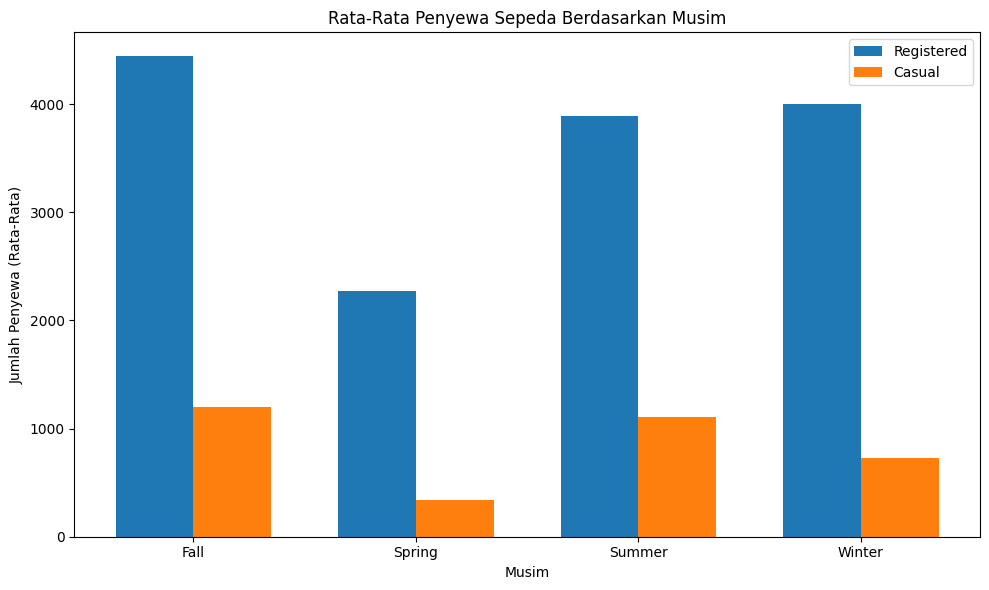

In [125]:
# Mengelompokkan data berdasarkan 'season' dan menghitung rata-rata kolom 'registered' dan 'casual'
season_pattern = day_df.groupby('season')[['registered', 'casual']].mean().reset_index()

# Membuat figure dengan ukuran 10x6
plt.figure(figsize=(10, 6))

# Menentukan lebar bar
bar_width = 0.35
index = np.arange(len(season_pattern))

# Membuat bar plot untuk data penyewa 'registered'
plt.bar(
    index,
    season_pattern['registered'],
    width=bar_width,
    label='Registered'
)

# Membuat bar plot untuk data penyewa 'casual', dengan sedikit offset untuk memisahkan grup
plt.bar(
    index + bar_width,
    season_pattern['casual'],
    width=bar_width,
    label='Casual'
)

# Menambahkan label pada sumbu X dan Y
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa (Rata-Rata)')

# Menambahkan judul pada plot
plt.title('Rata-Rata Penyewa Sepeda Berdasarkan Musim')

# Menampilkan legenda
plt.legend()

# Mengubah label pada sumbu X menjadi nama musim
plt.xticks(index + bar_width / 2, season_pattern['season'])

# Menampilkan plot
plt.tight_layout()  # Menjaga layout agar tidak terpotong
plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan kondisi cuaca?

<ipython-input-130-e0869029980a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weathersit_pattern = day_df.groupby('weathersit')[['registered', 'casual']].mean().reset_index()


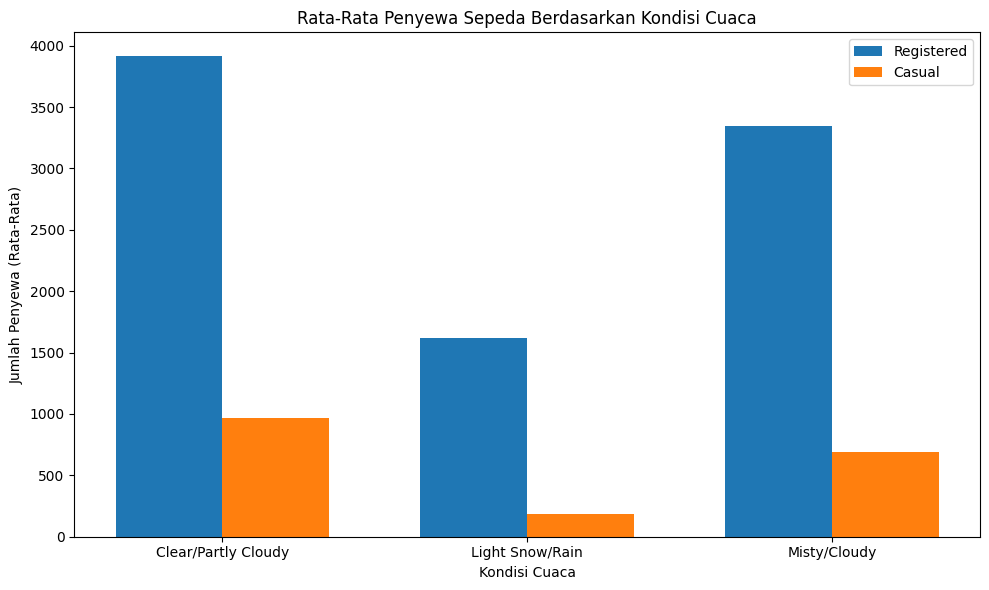

In [130]:
# Mengelompokkan data berdasarkan 'weathersit'
# dan menghitung rata-rata kolom 'registered' dan 'casual'
weathersit_pattern = day_df.groupby('weathersit')[['registered', 'casual']].mean().reset_index()

# Membuat figure dengan ukuran 10x6
plt.figure(figsize=(10, 6))

# Menentukan lebar bar
bar_width = 0.35
index = np.arange(len(weathersit_pattern))

# Membuat bar plot untuk data penyewa 'registered'
plt.bar(
    index,
    weathersit_pattern['registered'],
    width=bar_width,
    label='Registered'
)

# Membuat bar plot untuk data penyewa 'casual', dengan sedikit offset untuk memisahkan grup
plt.bar(
    index + bar_width,
    weathersit_pattern['casual'],
    width=bar_width,
    label='Casual'
)

# Menambahkan label pada sumbu X dan Y
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewa (Rata-Rata)')

# Menambahkan judul pada plot
plt.title('Rata-Rata Penyewa Sepeda Berdasarkan Kondisi Cuaca')

# Menampilkan legenda
plt.legend()

# Mengubah label pada sumbu X menjadi Kondisi Cuaca
plt.xticks(index + bar_width / 2, weathersit_pattern['weathersit'])

# Menampilkan plot
plt.tight_layout()  # Menjaga layout agar tidak terpotong
plt.show()

## Analisis Lanjutan (Opsional)

RFM DataFrame:
      Segment  Recency  Frequency  Monetary
0      Casual        0     620017   3100085
1  Registered        0    2672662  13363310


<ipython-input-138-987d91fc572f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Segment', y='Frequency', data=rfm_df, palette='viridis')
<ipython-input-138-987d91fc572f>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Segment', y='Monetary', data=rfm_df, palette='viridis')


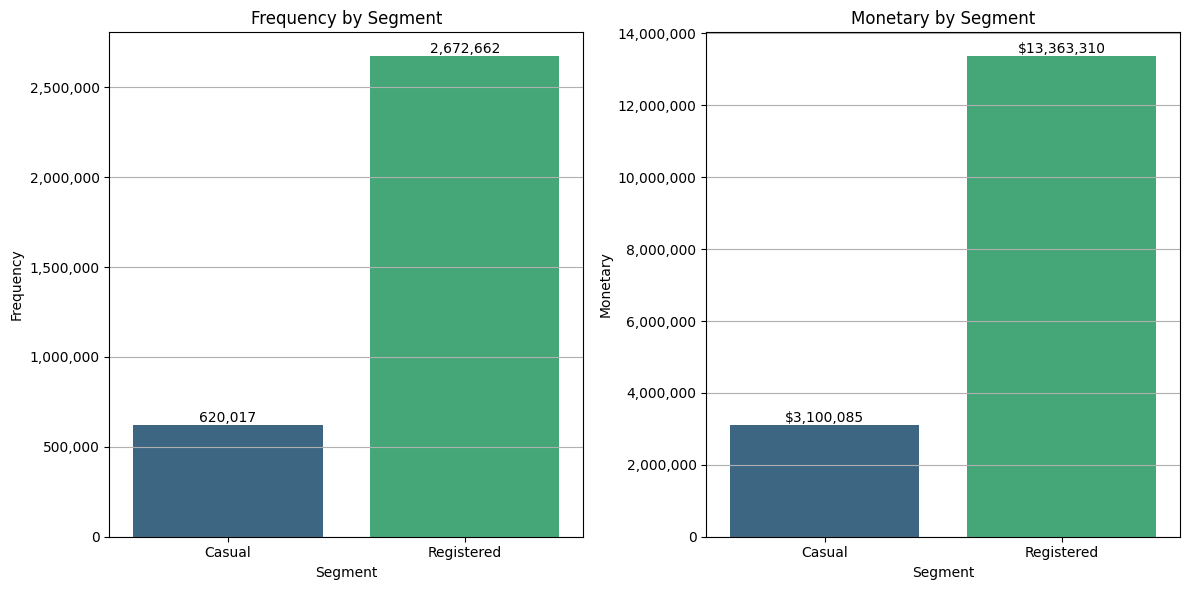

In [138]:
from matplotlib.ticker import FuncFormatter

# Mengubah kolom dteday menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menghitung Recency untuk casual dan registered
last_date = day_df['dteday'].max()

# Menghitung Recency
recency_casual = (last_date - day_df['dteday']).min().days  # Recency untuk casual
recency_registered = (last_date - day_df['dteday']).min().days  # Recency untuk registered

# Menghitung Frequency untuk casual dan registered
frequency_casual = day_df['casual'].sum()  # Total penyewaan casual
frequency_registered = day_df['registered'].sum()  # Total penyewaan registered

# Menghitung Monetary untuk casual dan registered
price_per_rental = 5  # Asumsi: setiap penyewaan dihargai $5
monetary_casual = frequency_casual * price_per_rental
monetary_registered = frequency_registered * price_per_rental

# Menampilkan hasil RFM
rfm_data = {
    'Segment': ['Casual', 'Registered'],
    'Recency': [recency_casual, recency_registered],
    'Frequency': [frequency_casual, frequency_registered],
    'Monetary': [monetary_casual, monetary_registered]
}

rfm_df = pd.DataFrame(rfm_data)
print("RFM DataFrame:")
print(rfm_df)

# Fungsi untuk format angka
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format angka dengan koma

# Visualisasi Frequency
plt.figure(figsize=(12, 6))

# Bar plot for Frequency
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Segment', y='Frequency', data=rfm_df, palette='viridis')
plt.title('Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Frequency')
ax1.yaxis.set_major_formatter(FuncFormatter(format_func))  # Terapkan format
plt.grid(axis='y')

# Menambahkan anotasi pada batang
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Bar plot for Monetary
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Segment', y='Monetary', data=rfm_df, palette='viridis')
plt.title('Monetary by Segment')
plt.xlabel('Segment')
plt.ylabel('Monetary')
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))  # Terapkan format
plt.grid(axis='y')

# Menambahkan anotasi pada batang
for p in ax2.patches:
    ax2.annotate(f'${int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Conclusion

- Pola penyewaan sepeda menurut musim menunjukkan peningkatan yang bertahap setiap musimnya. Musim semi mencatat jumlah penyewaan paling rendah, diikuti oleh peningkatan selama musim panas dan musim gugur, yang merupakan periode dengan penyewaan terbanyak. Sementara itu, penyewaan sepeda mengalami penurunan kecil pada musim dingin.
- Dalam hal cuaca, pola penyewaan sepeda menunjukkan bahwa pengguna paling banyak meminjam sepeda saat cuaca cerah, yang menjadi saat dengan jumlah penyewaan tertinggi. Sebaliknya, penyewaan sedikit menurun ketika cuaca mendung, dan jumlah penyewaan paling sedikit tercatat saat hujan. Ketika cuaca sedang buruk, tidak ada penyewaan sepeda yang terjadi.